# 4.9 Intro to Data Visualization with Python Exercise

# Contents

### 1. Importing Libaries and Data

### 2. Bar Chart

### 3. Histogram

### 4. Sampling Data

# Script

### 1. Importing Libaries and Data

In [1]:
#import libaries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path
path = r'C:\Users\tinar\OneDrive\Dokumente\00 DATA ANALYST Carrer Foundry\04 Immersion Course\4. Python Fundamentals for Data Analysts\2209 Instacart Basket Analysis'

In [3]:
# import of orders_products_merged from 4.8
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','02 Prepared Data','orders_products_merged_48.pkl'))

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_time_of_the_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,Mid-range product,Regularly busy,Fewest orders,Fewest orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,Mid-range product,Regularly busy,Average orders,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,Mid-range product,Regularly busy,Most orders,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,Mid-range product,Least busy,Average orders,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,Mid-range product,Least busy,Most orders,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


### 2. Bar Chart

<AxesSubplot:>

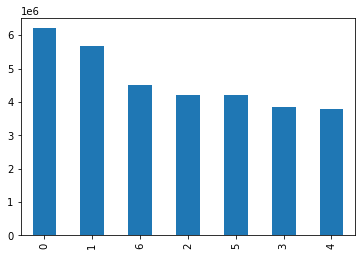

In [5]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

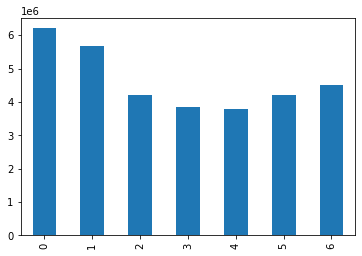

In [6]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [7]:
ords_prods_merge['order_dow'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_dow, dtype: int64

<AxesSubplot:>

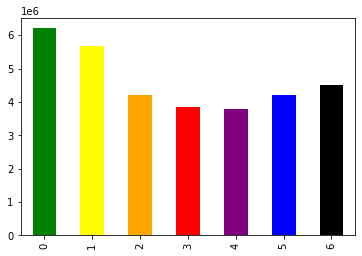

In [8]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color = ['green', 'yellow', 'orange', 'red', 'purple', 'blue', 'black'])

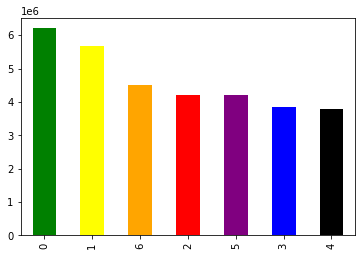

In [9]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['green', 'yellow', 'orange', 'red', 'purple', 'blue', 'black'])

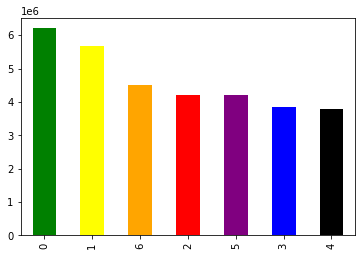

In [10]:
bar.figure

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'bar_orders_dow.png'))

### 3. Histograms

<AxesSubplot:ylabel='Frequency'>

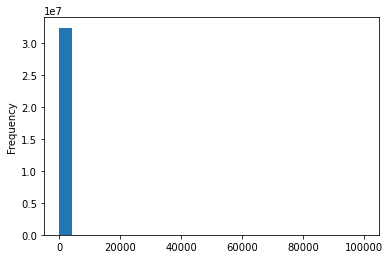

In [13]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

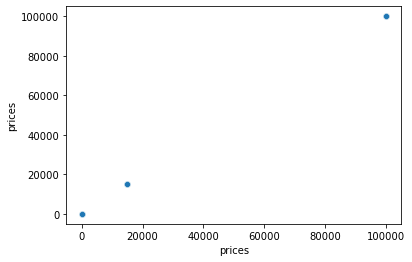

In [15]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_time_of_the_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag


In [17]:
# turn the outliners into NaNs because they don't make sense (replacing outliers with missing values)
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

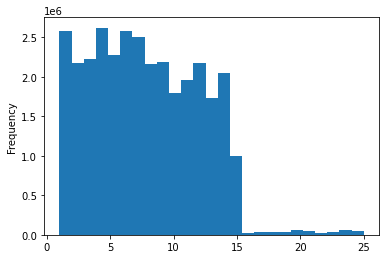

In [20]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

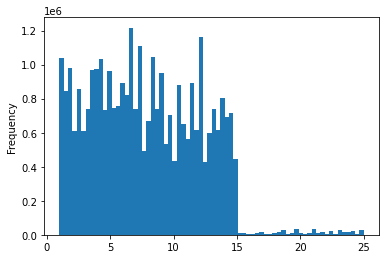

In [21]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [22]:
hist.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'hist_prices.png'))

### 4. Sampling Data

In [23]:
np.random.seed(4)

# Create a list halding True/False values to the test np.random.rant() <=0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
# Store 70% of the sample in the dataframe
big = ords_prods_merge[dev]

# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [27]:
len(ords_prods_merge)

32404859

In [28]:
len(big)+len(small)

32404859

In [30]:
df_2 = small[['order_dow','prices']]

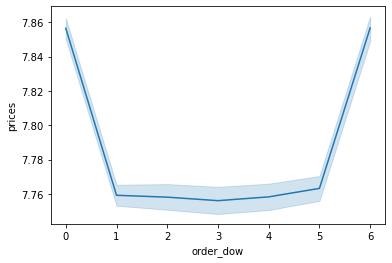

In [32]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')